## PCA/LDA

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

train=pd.read_csv('heart.csv') 

In [12]:

train_ind = train.drop(['output'],axis=1)
target = train['output']

print( 'Train independent dataset shape:', train_ind.shape , 'and', 'Train target dataset shape:', target.shape)

#Splitting the dataset to train and test.
X_train, X_test, y_train, y_test = train_test_split(train_ind, target, test_size=0.30, random_state=42)
print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)


Train independent dataset shape: (303, 13) and Train target dataset shape: (303,)
X train size:  (212, 13)
y train size:  (212,)
X test size:  (91, 13)
y test size:  (91,)


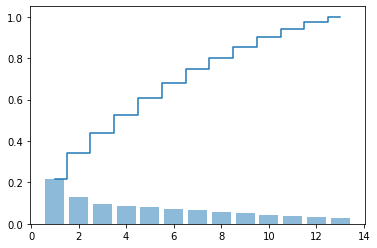

In [13]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std.copy())
#X_train_lda = lda.fit_transform(X_train_std)

pca.explained_variance_ratio_
plt.bar(range(1,14), pca.explained_variance_ratio_, alpha=0.5, align="center")
plt.step(range(1,14), np.cumsum(pca.explained_variance_ratio_), where="mid")

In [14]:
X_train.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

/Users/alanhc/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if __name__ == '__main__':


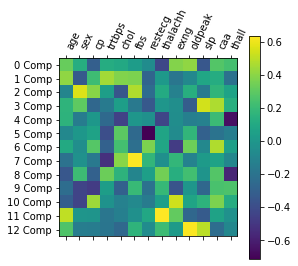

In [15]:
pc_features = list(range(pca.components_.shape[0]))
names = []
for i in pc_features:
    names.append(str(i)+' Comp')
plt.matshow(pca.components_,cmap='viridis')
plt.yticks(pc_features,names,fontsize=10)
plt.colorbar()
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=65,ha='left')
plt.tight_layout()

Text(0, 0.5, 'PC 2')

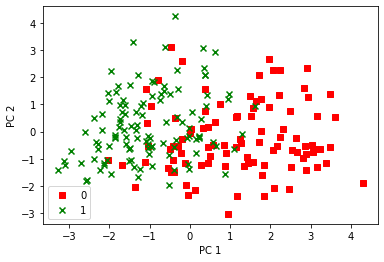

In [16]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

plt.figure()
colors = ['r','g']
markers = ['s', 'x']

for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m
                )
plt.legend(loc="lower left")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

Text(0, 0.5, 'PC 2')

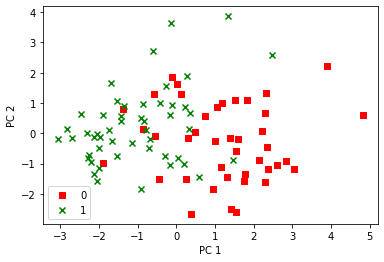

In [17]:
for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_test_pca[y_test==l, 0],
                X_test_pca[y_test==l, 1],
                c=c, label=l, marker=m
                )
plt.legend(loc="lower left")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

In [18]:
def plot_decision_regions(X, y, classifier, resolution =0.02):
    
    #設定顏色表
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightred', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #繪製決策區域
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx,c1 in enumerate(np.unique(y)):
        plt.scatter(x = X[y == c1, 0], 
                    y =X[y == c1, 1],
                    alpha = 0.6, 
                    c = cmap(idx),
                    marker = markers[idx], 
                    label = c1)
        



/Users/alanhc/opt/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if yo

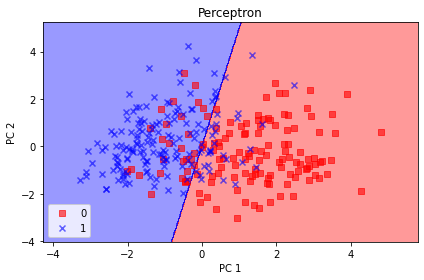

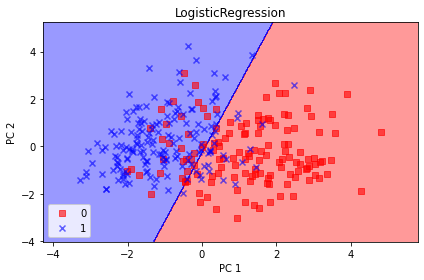

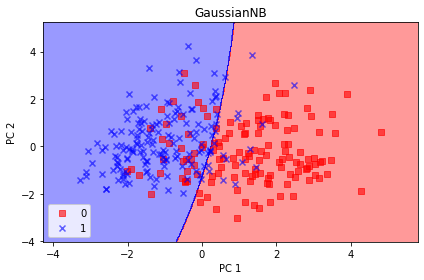

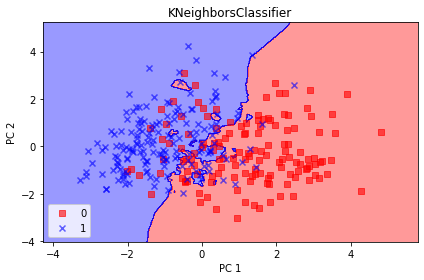

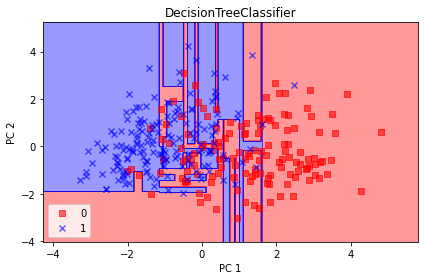

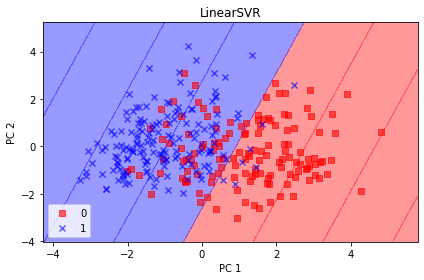

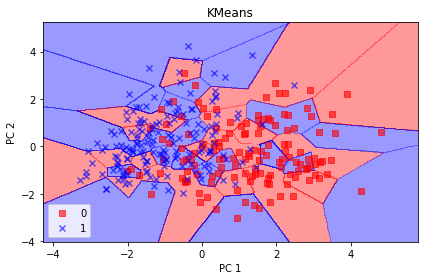

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.cluster import MiniBatchKMeans, KMeans

ppn = Perceptron(max_iter = 40, eta0 = 0.1, random_state = 0)


lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
gnb = GaussianNB()
knc = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svmLR = svm.LinearSVR()
km = KMeans(n_clusters=50)

models = [ppn, lr, gnb, knc, dt, svmLR,km]
for model in models:
    model.fit(X_train_pca, y_train)
    

X_combined_pca = np.vstack((X_train_pca, X_test_pca))
y_combined = np.hstack((y_train, y_test))

for model in models:
    model_name = type(model).__name__
    
    plt.figure()
    plot_decision_regions(X=X_combined_pca, 
                          y=y_combined, 
                          classifier=model)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.legend(loc="lower left")
    plt.title(model_name)
    plt.tight_layout()
    plt.savefig("img/"+model_name+".png")

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#lda = LDA(n_components=2)
lda = LDA()
X_train_lda = lda.fit_transform(X_train_std, y_train)

X_train_lda.shape

(212, 1)

## 分群

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score


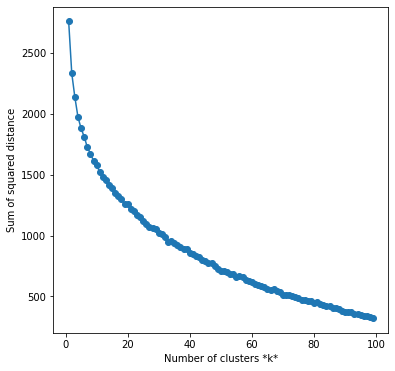

In [22]:
sse = []
list_k = list(range(1, 100))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_train_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

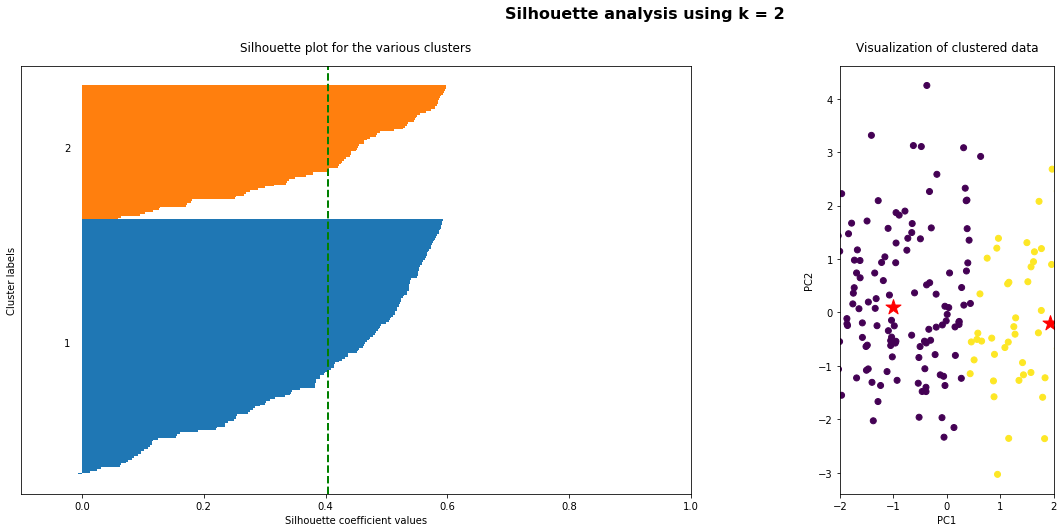

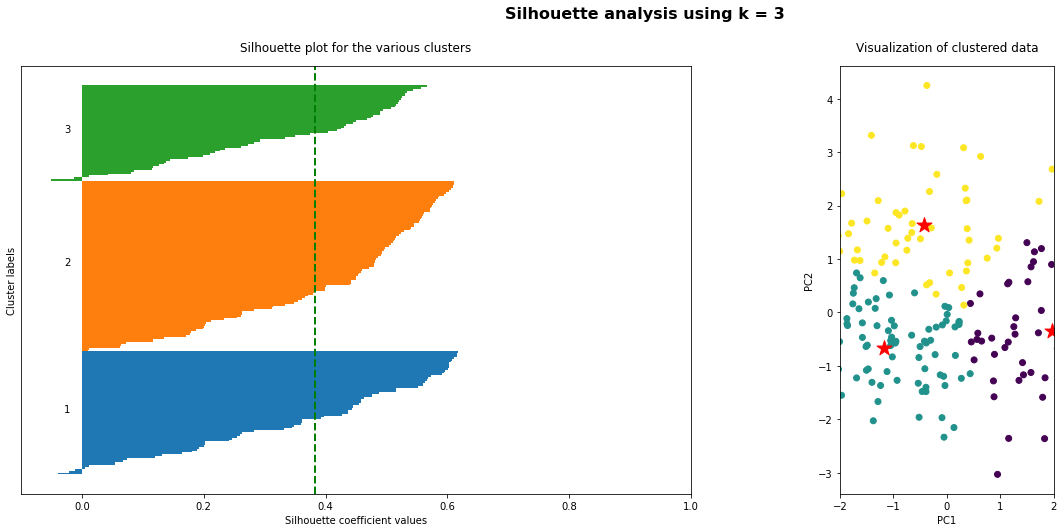

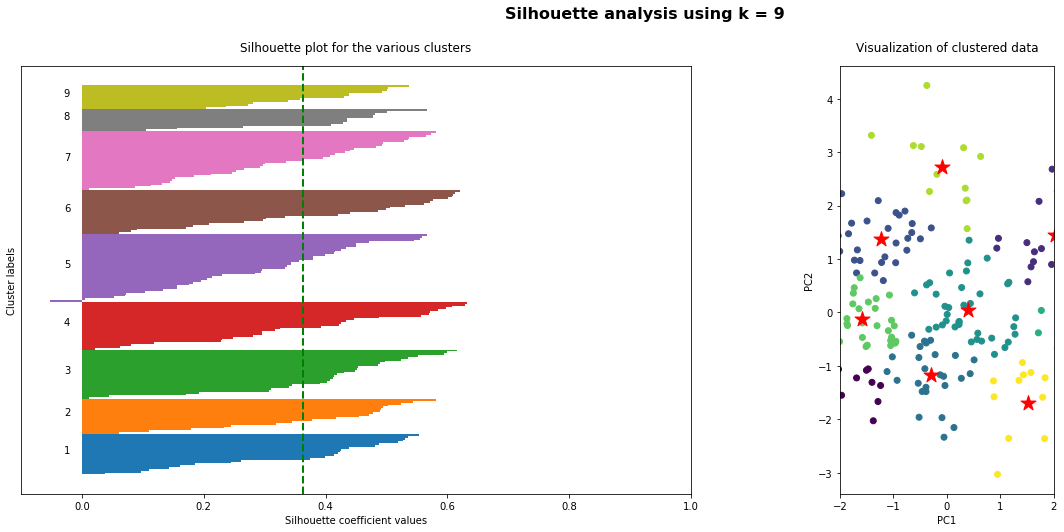

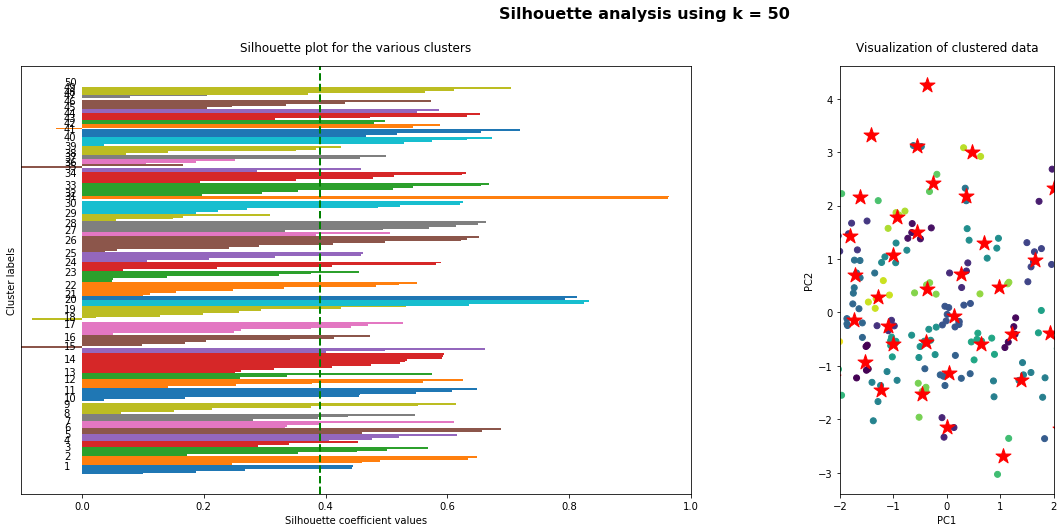

In [23]:
for i, k in enumerate([2,3,9,50]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_train_pca)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_train_pca, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

## hierarchy

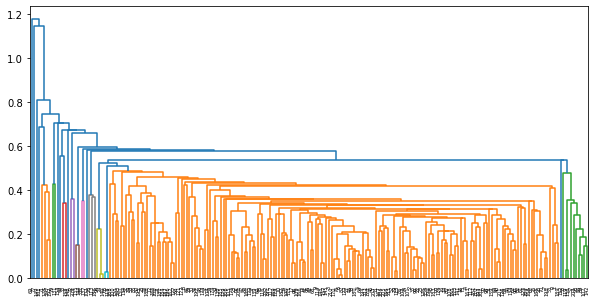

In [24]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist


distance_mat = pdist(X_train_pca) # pdist calculates the upper triangle of the distance matrix

Z = hierarchy.linkage(distance_mat, 'single') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)
plt.savefig("mig.png")

In [26]:
## Kmeans Compression
def replaceWithCentroid(kmeans):
    new_pixels = []
    for label in kmeans.labels_:
        pixel_as_centroid = list(kmeans.cluster_centers_[label])
        new_pixels.append(pixel_as_centroid)
    #new_pixels = np.array(new_pixels).reshape(*X_train_pca.size, -1)
    return new_pixels
X_compressed = replaceWithCentroid(km)
X_compressed = np.array(X_compressed)
X_compressed.shape

(212, 2)

Text(0, 0.5, 'PC 2')

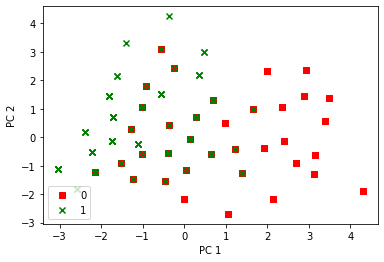

In [27]:

plt.figure()
colors = ['r','g']
markers = ['s', 'x']

for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_compressed[y_train==l, 0],
                X_compressed[y_train==l, 1],
                c=c, label=l, marker=m
                )
plt.legend(loc="lower left")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

In [28]:
print(train.isnull().sum()) 

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [29]:
print(train.describe())

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [30]:
for i in train.columns:
    print( i , ':', train[i].nunique())


age : 41
sex : 2
cp : 4
trtbps : 49
chol : 152
fbs : 2
restecg : 3
thalachh : 91
exng : 2
oldpeak : 40
slp : 3
caa : 5
thall : 4
output : 2


## K-Means and MiniBatchKMeans

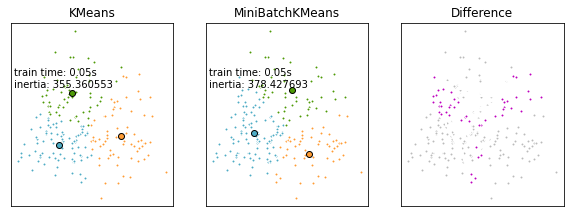

In [35]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs

X, labels_true = X_train_pca, y_train
batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)


k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

mbk = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=batch_size,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0


fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

k_means_cluster_centers = k_means.cluster_centers_
order = pairwise_distances_argmin(k_means.cluster_centers_,
                                  mbk.cluster_centers_)
mbk_means_cluster_centers = mbk.cluster_centers_[order]

k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' %
         (t_mini_batch, mbk.inertia_))

# Initialise the different array to all False
different = (mbk_means_labels == 4)
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += ((k_means_labels == k) != (mbk_means_labels == k))

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.')
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.')
ax.set_title('Difference')
ax.set_xticks(())
ax.set_yticks(())

plt.show()


